In [146]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
train_path = './data/train/'
test_path = './data/test/'
df_patient = pd.read_excel(train_path+'patient/train.cd.eval.xlsx')
df_control = pd.read_excel(train_path+'control/train.cc.eval.xlsx')
df_test = pd.read_excel(test_path+'test.eval.re.xlsx')

In [148]:
df_train = pd.concat([df_patient,df_control])

In [149]:
train = df_train.drop(['Language','Corpus','Code'],axis = 1,inplace = False).reset_index()
test = df_test.drop(['Language','Corpus','Code'],axis = 1,inplace = False).reset_index()

# Data Preprocessing

In [150]:
train

,index,File,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,0,S079.cha,ProbableAD,68,13,13,8.308,9.769,59,119,...,6.723,0.840,12.605,15.126,0.783,0.812,52,64,7,7
1,1,S080.cha,ProbableAD,13,3,3,5.333,7.000,14,19,...,5.263,0.000,15.789,15.789,1.333,0.800,8,10,0,1
2,2,S081.cha,ProbableAD,53,15,15,9.133,11.333,61,152,...,1.974,0.658,17.105,9.868,1.545,0.776,66,85,4,2
3,3,S082.cha,ProbableAD,107,11,10,9.500,11.000,55,105,...,7.619,1.905,15.238,12.381,1.133,0.651,41,63,3,12
4,4,S083.cha,ProbableAD,58,7,7,10.286,12.143,44,73,...,4.110,0.000,12.329,9.589,1.000,0.895,34,38,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,49,S071.cha,Control,17,5,5,6.600,8.800,20,35,...,5.714,0.000,25.714,0.000,1.667,1.059,18,17,0,0
104,50,S072.cha,Control,49,11,11,8.545,10.545,57,99,...,3.030,2.020,15.152,8.081,1.312,0.768,43,56,0,1
105,51,S073.cha,Control,40,10,10,7.700,9.500,44,82,...,3.659,0.000,15.854,8.537,1.143,0.756,34,45,1,1
106,52,S076.cha,Control,36,9,9,8.222,10.444,51,80,...,2.500,3.750,10.000,11.250,0.750,0.814,35,43,2,0


In [151]:
class_dict = {'ProbableAD':1,'Control':0}
X = train.iloc[:,3:]
Y = train.iloc[:,2].map(class_dict)
X_test = test.iloc[:,3:]

In [152]:
for i in range(X.shape[1]):
    X_temp = pd.concat([X.iloc[:,i],X_test.iloc[:,i]],axis = 0)
    X_temp.iloc[:]/=np.linalg.norm(X_temp.iloc[:])
    X.iloc[:,i] = X_temp.iloc[:X.shape[0]]
    X_test.iloc[:,i] = X_temp.iloc[X.shape[0]:]
X

,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,Verbs_Utt,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,0.096317,0.097695,0.098783,0.072738,0.070186,0.092046,0.091554,0.067097,0.070646,0.087934,...,0.087678,0.042513,0.066804,0.121036,0.041167,0.055053,0.085325,0.094127,0.228680,0.253917
1,0.018414,0.022545,0.022796,0.046691,0.050292,0.021841,0.014618,0.099698,0.059001,0.051971,...,0.068638,0.000000,0.083679,0.126341,0.070083,0.054240,0.013127,0.014707,0.000000,0.036274
2,0.075071,0.112725,0.113980,0.079961,0.081423,0.095166,0.116943,0.054245,0.115776,0.072759,...,0.025744,0.033302,0.090653,0.078962,0.081229,0.052613,0.108297,0.125013,0.130674,0.072548
3,0.151558,0.082665,0.075987,0.083174,0.079031,0.085805,0.080783,0.070884,0.039615,0.070888,...,0.099364,0.096413,0.080758,0.099071,0.059568,0.044138,0.067276,0.092656,0.098006,0.435286
4,0.082153,0.052605,0.053191,0.090056,0.087243,0.068644,0.056163,0.081571,0.050809,0.081646,...,0.053601,0.000000,0.065341,0.076730,0.052576,0.060681,0.055790,0.055888,0.065337,0.036274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.024079,0.037575,0.037993,0.057784,0.063224,0.031202,0.026928,0.077242,0.083113,0.062365,...,0.074519,0.000000,0.136279,0.000000,0.087644,0.071800,0.029536,0.025003,0.000000,0.000000
104,0.069405,0.082665,0.083586,0.074813,0.075762,0.088926,0.076167,0.077919,0.081562,0.075617,...,0.039516,0.102233,0.080303,0.064663,0.068979,0.052070,0.070557,0.082361,0.000000,0.036274
105,0.056657,0.075150,0.075987,0.067415,0.068254,0.068644,0.063088,0.072643,0.082757,0.067562,...,0.047719,0.000000,0.084023,0.068312,0.060094,0.051257,0.055790,0.066183,0.032669,0.036274
106,0.050991,0.067635,0.068388,0.071985,0.075036,0.079565,0.061549,0.086170,0.089709,0.086635,...,0.032604,0.189789,0.052998,0.090021,0.039432,0.055189,0.057430,0.063242,0.065337,0.000000


# Train Test Split

In [153]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle = True)

In [154]:
def cm_show(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (7,3))
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,fmt = '', annot=labels)
    
    accuracy  = np.trace(cm) / float(np.sum(cm))
    precision = cm[1,1] / sum(cm[:,1])
    recall    = cm[1,1] / sum(cm[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
        accuracy,precision,recall,f1_score)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stats_text)

In [157]:
class_dict_rev = {}
for k,v in class_dict.items():
    class_dict_rev[v]=k
def output(clf,X,X_test,filename,path='./output/',map_dict = class_dict_rev):
    X['Group'] = clf.predict(X_test)
    X['Group'] = X['Group'].map(map_dict)
    X.to_excel(path+filename,index=False)

# Logistic Regression

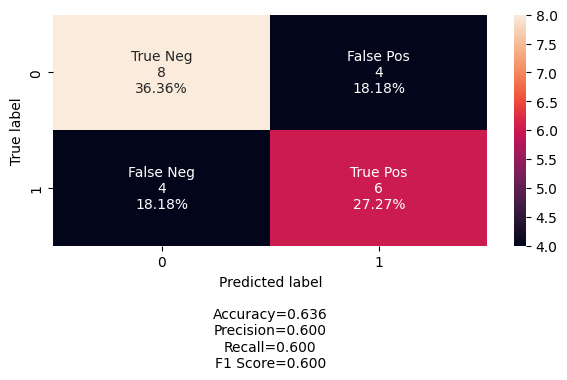

In [158]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
cm_show(y_val,y_pred)
output(LR,df_test,X_test,'LR.xlsx')

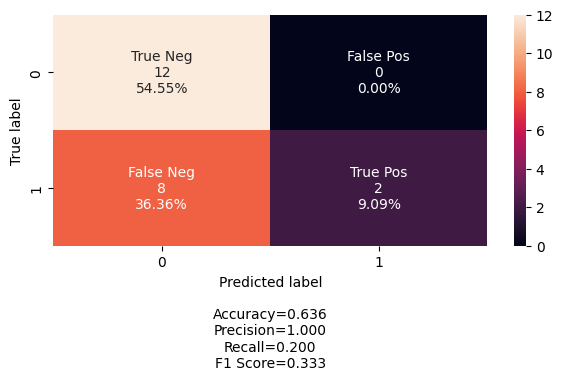

In [131]:
svm = LinearSVC(class_weight='balanced', random_state=42, loss="hinge")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
cm_show(y_val,y_pred)

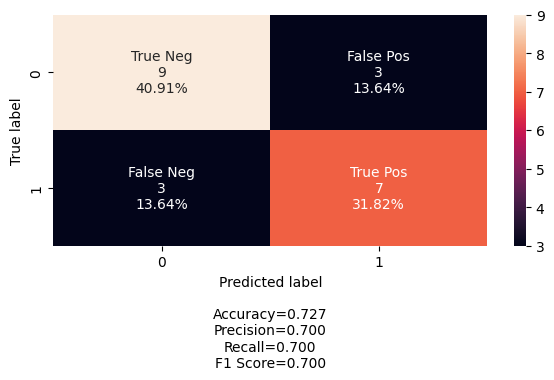

In [132]:
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_val)
cm_show(y_val,y_pred)

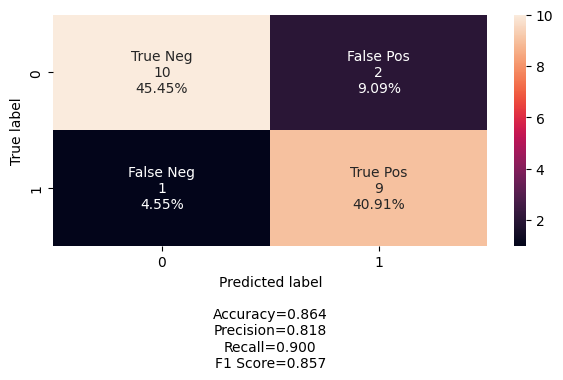

In [133]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
cm_show(y_val,y_pred)

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)